**ИМПОРТ БИБЛИОТЕК**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy import stats as st
import math
import numpy as np

pd.set_option('display.max_rows', 99999)
pd.set_option('display.max_columns', 99999)
pd.set_option('display.max_colwidth', 99999)

**ПРЕДОБРАБОТКА ДАННЫХ**

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
#Посмотрим на наши данные
display(hypothesis.head())
display(orders.head())
display(visitors.head())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [6]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [7]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Данные хорошие, пропусков нет. В таблицах orders и visitors дату перевели из object в datetime

In [8]:
#Посмотрим дубликаты в столбце visitorId
orders_duplicated = orders[orders['visitorId'].duplicated(keep=False)]
#orders_duplicated.sort_values(by='visitorId', ascending=True) #закомментим вывод на экран
#дубликаты есть

In [9]:
#Составим сводную по пользователям, в столбцах оставим подсчёт транзакций по группам. Откинем Nan
orders_duplicated = orders_duplicated.pivot_table(index='visitorId', columns = ['group'], aggfunc ={'transactionId':'count'})
orders_duplicated.columns = ['a_count','b_count'] #переименуем
orders_duplicated = orders_duplicated.dropna().reset_index() #откинем Nan, сбросим индексы
orders_duplicated

,visitorId,a_count,b_count
0,8300375,1.0,1.0
1,199603092,4.0,1.0
2,232979603,1.0,1.0
3,237748145,4.0,1.0
4,276558944,1.0,1.0
5,351125977,1.0,1.0
6,393266494,1.0,2.0
7,457167155,1.0,3.0
8,471551937,1.0,1.0
9,477780734,1.0,1.0


In [10]:
dropid_list = orders_duplicated['visitorId'].to_list()

In [11]:
orders = orders.query('visitorId not in @dropid_list')
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1016 non-null int64
visitorId        1016 non-null int64
date             1016 non-null datetime64[ns]
revenue          1016 non-null int64
group            1016 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


Вывод: найдено 57 пересечений в группах. Непонятно по какой причине эти юзеры попали в обе группы. подозреваю, что для чистоты эксперимента их надо откинуть и дальше вести расчёт без них. Исключили 181 строку из датасета orders. Непонятно по какому признаку их определять в группу А или В

**ЧАСТЬ №1. Приоритизация гипотез**

**1.1 Примение фреймворка ICE для приоритизации гипотез:**

In [12]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round(2)
hypothesis.sort_values('ICE', ascending=False).head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


In [13]:
ICE = hypothesis[['Hypothesis', 'ICE']].set_index('Hypothesis').sort_values('ICE', ascending=True)

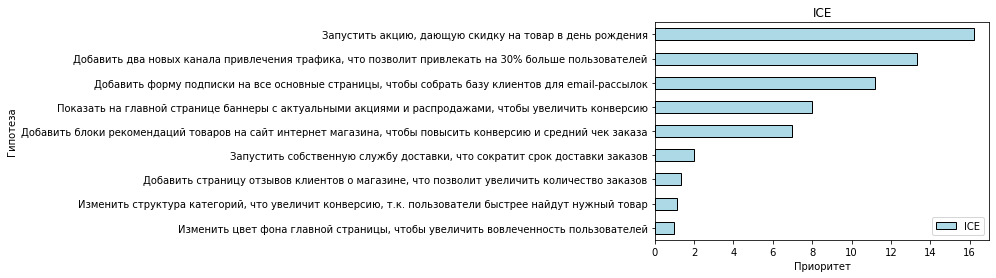

In [14]:
ax = ICE.plot(kind='barh', ec='black', color ='lightblue')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('ICE');

**1.2 Примение фреймворка RICE для приоритизации гипотез:**

In [15]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round(2)

In [16]:
hypothesis.sort_values('RICE', ascending=False).head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


In [17]:
RICE = hypothesis[['Hypothesis', 'RICE']].set_index('Hypothesis').sort_values('RICE', ascending=True)

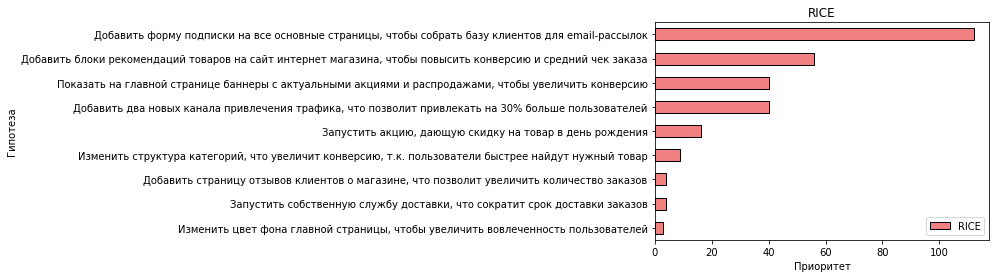

In [18]:
ax = RICE.plot(kind='barh', ec='black', color ='lightcoral')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('RICE');

**1.3. Сравнительный анализ:**

In [19]:
hypothesis[['Hypothesis','RICE','ICE']].sort_values('RICE', ascending=False)

,Hypothesis,RICE,ICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0,11.20
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0,7.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,13.33
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0,8.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,1.12
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,1.33
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,1.00


Вывод 1.3: Параметр Reach, который учитывается при расчёте RICE меняет всю приоритетность


 - Без учета охвата на первом месте идет акция со скидкой имениннику, но параметр Reach понизил ранг этой акции. Есть подозрение, что именниников значительно меньше, чем всех покупателей.
 
 - Аналогично произошло с гипотезой о добавлении 2х каналов трафика, с организацией своей службы доставки и с идеей о добавлении страницы отзывов.
 
 - Без изменений осталась позиция гипотез о добавлении баннеров с актуальными акциями  и идея с изменением цвета фона  страницы
 
 - выросли в рейтинге RICE гипотеза о добавлении формы подписки на все основные страницы ресурса, о добавлении блоков рекомендаций товаров и предложение об изменении структуры категорий.

**ЧАСТЬ №2 АНАЛИЗ А/В ТЕСТА**

**2.1 График кумулятивной выручки по группам**

Для построения графиков соединим датасеты orders и visitors. Найдем средний чек и конверсию

In [20]:
display(orders.head())
display(visitors.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [21]:
# группируем по дате и группам А и В
orders_grouped = (orders.groupby(['date','group'], as_index = False).agg({'transactionId':'nunique',
                                                                          'visitorId':'nunique','revenue':'sum'}))

orders_grouped = orders_grouped.rename(columns={'transactionId':'orders','visitorId':'buyers'})
orders_grouped['group2'] = orders_grouped['group']
orders_grouped = orders_grouped.set_index(['date','group'])

# Найдем кумулятивную сумму
orders_cumsum = orders_grouped.sort_values(['date','group']).groupby('group2').cumsum().reset_index()
orders_cumsum.head()

,date,group,orders,buyers,revenue
0,2019-08-01,A,23,19,142779
1,2019-08-01,B,17,17,59758
2,2019-08-02,A,42,37,234381
3,2019-08-02,B,40,39,221801
4,2019-08-03,A,66,61,346854


In [22]:
# Cчитаем визиты в каждой группе
visitors_cumsum = visitors.groupby(['date','group'], as_index=False).agg({'visitors':'sum'}).sort_values(['date','group'])
# Найдем кумулятивную сумму
visitors_cumsum['group2'] = visitors_cumsum['group']
visitors_cumsum = visitors_cumsum.set_index(['date','group']).groupby('group2').cumsum().reset_index()
visitors_cumsum.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-01,B,713
2,2019-08-02,A,1338
3,2019-08-02,B,1294
4,2019-08-03,A,1845


In [23]:
# объединим в общую таблицу
cummulative = orders_cumsum.join(visitors_cumsum[['visitors']])
cummulative.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,37,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,61,346854,1845


In [24]:
# Рассчитаем средний чек и конверсию
cummulative['average_check'] = (cummulative['revenue'] / cummulative['orders']).round(0)
cummulative['conversion'] = cummulative['orders'] / cummulative['visitors']

In [25]:
cummulative.head()

,date,group,orders,buyers,revenue,visitors,average_check,conversion
0,2019-08-01,A,23,19,142779,719,6208.0,0.031989
1,2019-08-01,B,17,17,59758,713,3515.0,0.023843
2,2019-08-02,A,42,37,234381,1338,5580.0,0.031390
3,2019-08-02,B,40,39,221801,1294,5545.0,0.030912
4,2019-08-03,A,66,61,346854,1845,5255.0,0.035772


Начнём построение графика:

In [26]:
CUM_A_REVENUE = cummulative[cummulative['group']=='A'][['date', 'revenue']]
CUM_B_REVENUE = cummulative[cummulative['group']=='B'][['date', 'revenue']]

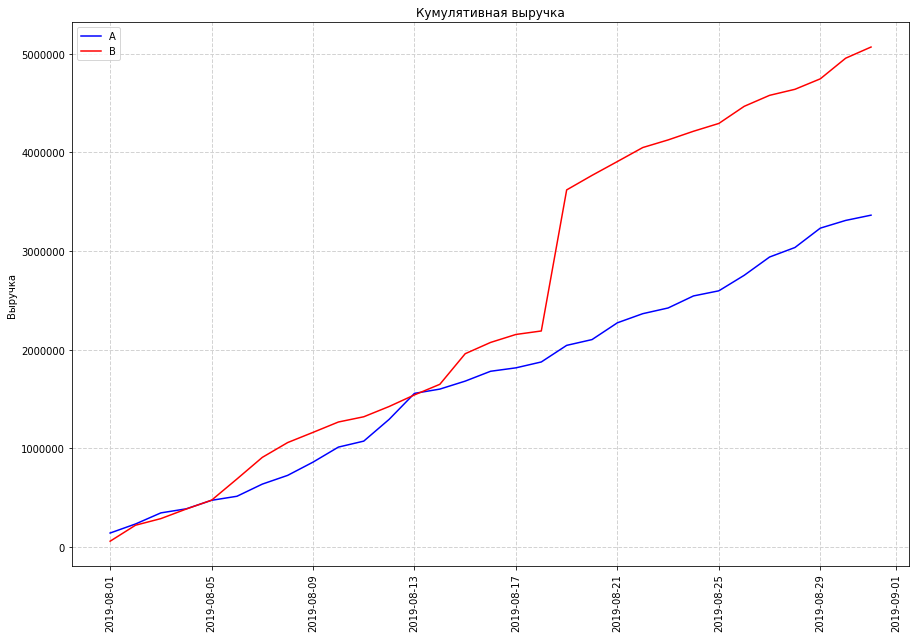

In [27]:
plt.figure(figsize=(15,10))
plt.grid(color='lightgrey', linestyle='--', linewidth=1)
plt.plot(CUM_A_REVENUE.iloc[:,0], CUM_A_REVENUE.iloc[:,1], label='A', color = 'b')
plt.plot(CUM_B_REVENUE.iloc[:,0], CUM_B_REVENUE.iloc[:,1], label='B', color = 'r')
plt.title('Кумулятивная выручка')
plt.ylabel("Выручка")
plt.xticks(rotation=90)
plt.legend()
plt.show()

Вывод по 2.1: В группе В виден резкий выброс

**2.2 График кумулятивного среднего чека**

In [28]:
CUM_A_AVGCHECK = cummulative[cummulative['group']=='A'][['date', 'average_check']]
CUM_B_AVGCHECK = cummulative[cummulative['group']=='B'][['date', 'average_check']]

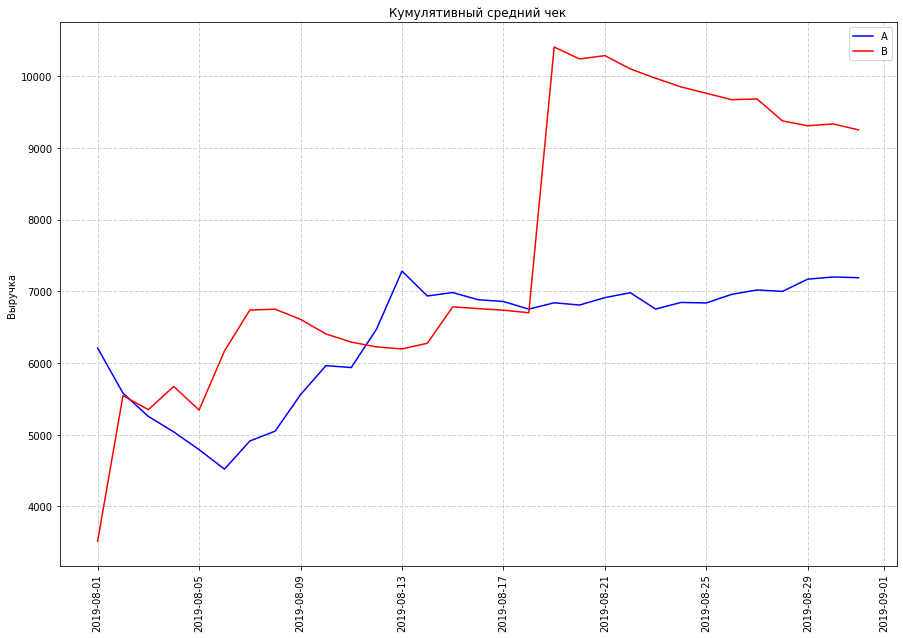

In [29]:
plt.figure(figsize=(15,10))
plt.grid(color='lightgrey', linestyle='--', linewidth=1)
plt.plot(CUM_A_AVGCHECK.iloc[:,0], CUM_A_AVGCHECK.iloc[:,1], label='A', color ='b')
plt.plot(CUM_B_AVGCHECK.iloc[:,0], CUM_B_AVGCHECK.iloc[:,1], label='B', color ='r')
plt.title('Кумулятивный средний чек')
plt.ylabel("Выручка")
plt.xticks(rotation=90)
plt.legend()
plt.show()

Вывод по 2.2: Аналогично виден выброс в группе B. Затем график среднего чека в группе В идет на спад.

**2.3 График относительного изменения кумулятивного среднего чека группы B к группе A**

In [30]:
# переименуем столбцы с одинаковым называнием, для удобства
CUM_A_AVGCHECK.columns = ['date', 'average_check_a']
CUM_B_AVGCHECK.columns = ['date', 'average_check_b']

In [31]:
# объединим таблицы
compare = CUM_A_AVGCHECK.merge(CUM_B_AVGCHECK, on='date')

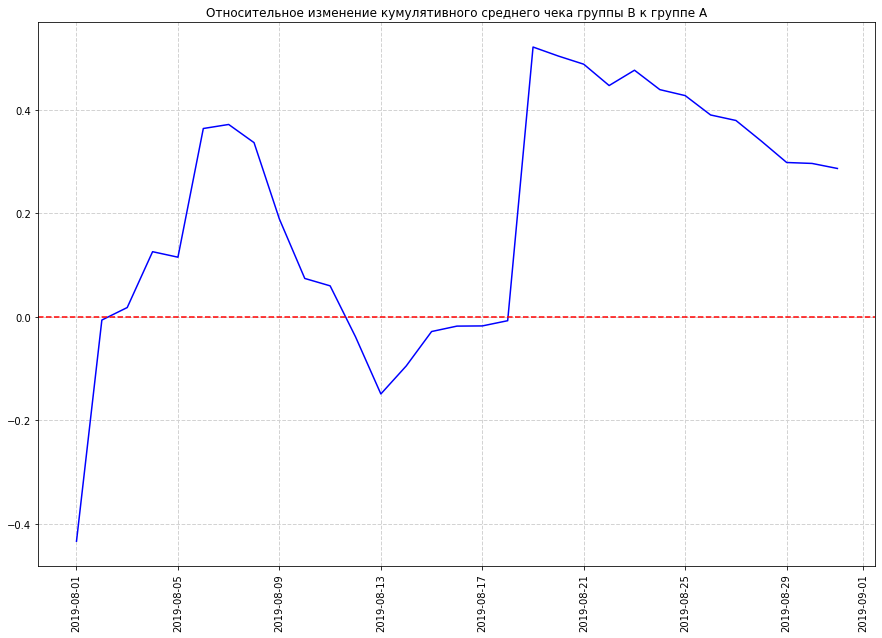

In [32]:
plt.figure(figsize=(15,10))
plt.grid(color='lightgrey', linestyle='--', linewidth=1)
plt.plot(compare['date'], compare['average_check_b'] / compare['average_check_a']-1, color ='b')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='red', linestyle='--')
plt.xticks(rotation=90)
plt.show()

Вывод по 2.3: На графике заметен знакомый нам выброс. Средний чек группы В плавно снижается.

**2.4 График кумулятивной конверсии по группам**

In [33]:
CUM_A_CONVERSION = cummulative[cummulative['group']=='A'][['date', 'conversion']]
CUM_B_CONVERSION = cummulative[cummulative['group']=='B'][['date', 'conversion']]

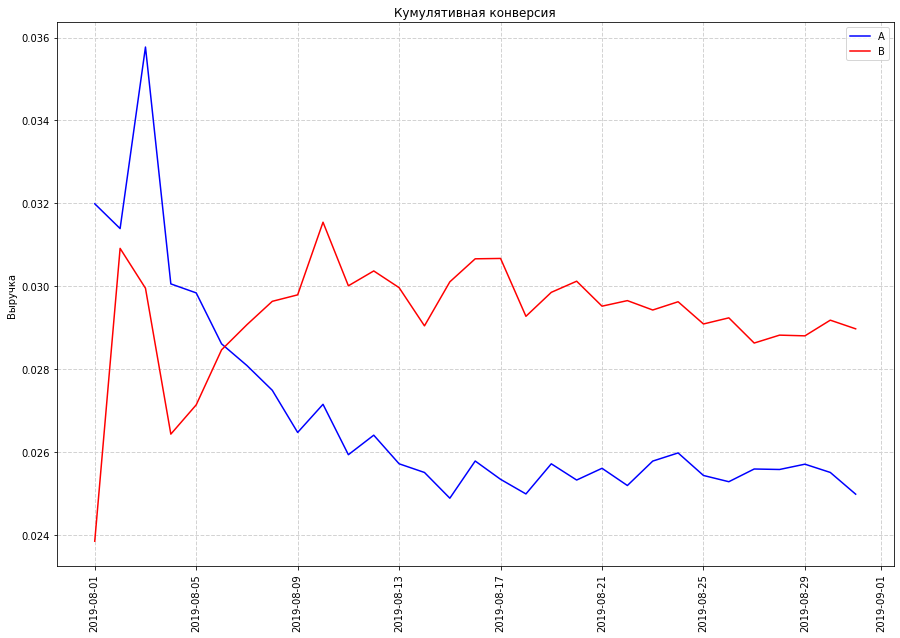

In [34]:
plt.figure(figsize=(15,10))
plt.grid(color='lightgrey', linestyle='--', linewidth=1)
plt.plot(CUM_A_CONVERSION.iloc[:,0], CUM_A_CONVERSION.iloc[:,1], label='A', color ='b')
plt.plot(CUM_B_CONVERSION.iloc[:,0], CUM_B_CONVERSION.iloc[:,1], label='B', color ='r')
plt.title('Кумулятивная конверсия')
plt.ylabel("Выручка")
plt.xticks(rotation=90)
plt.legend()
plt.show()

Вывод по 2.4: Конверсия группы В смотрится определенно лучше. После первой недели тестов график кумулятивной конверсии стабилизировался

 **2.5 График относительного изменения кумулятивной конверсии группы B к группе A**

In [35]:
# переименуем столбцы с одинаковым называнием, для удобства
CUM_A_CONVERSION.columns = ['date', 'conversion_a']
CUM_B_CONVERSION.columns = ['date', 'conversion_b']

In [36]:
compare2 = CUM_A_CONVERSION.merge(CUM_B_CONVERSION, on='date')

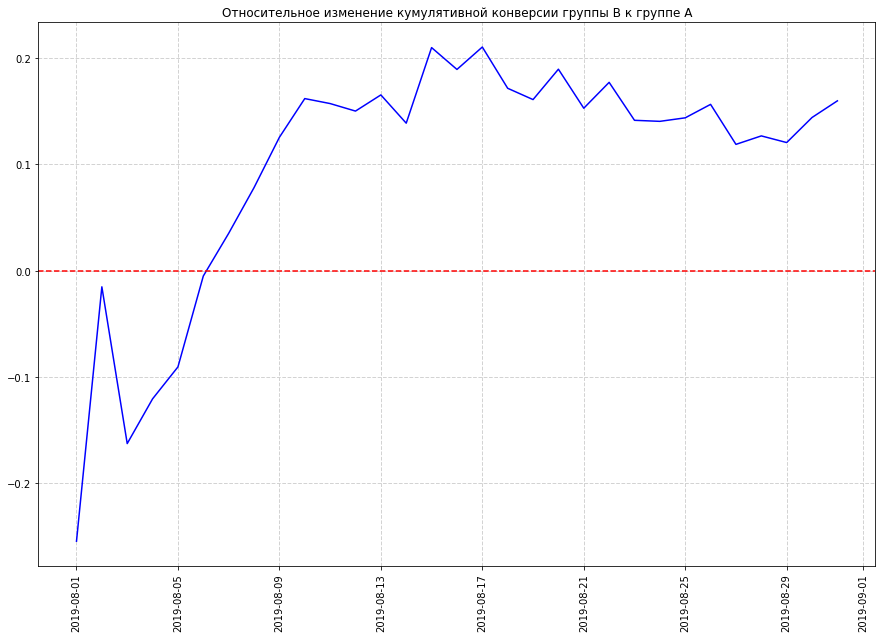

In [37]:
plt.figure(figsize=(15,10))
plt.grid(color='lightgrey', linestyle='--', linewidth=1)
plt.plot(compare2['date'], compare2['conversion_b'] / compare2['conversion_a']-1, color ='b')
plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')
plt.axhline(y=0, color='red', linestyle='--')
plt.xticks(rotation=90)
plt.show()

Вывод по 2.5: Группа В стабильно лучше группы А по конверсии

**2.6 Точечный график количества заказов по пользователям**

In [38]:
# Cоставим таблицу с количеством заказов для каждого пользователя
orders_per_user = orders.groupby('visitorId').agg({'transactionId':'nunique'})
orders_per_user.columns = ['orders']
orders_per_user = orders_per_user.reset_index()
orders_per_user.head()

,visitorId,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


In [39]:
x_values = pd.Series(range(0,len(orders_per_user['orders'])))

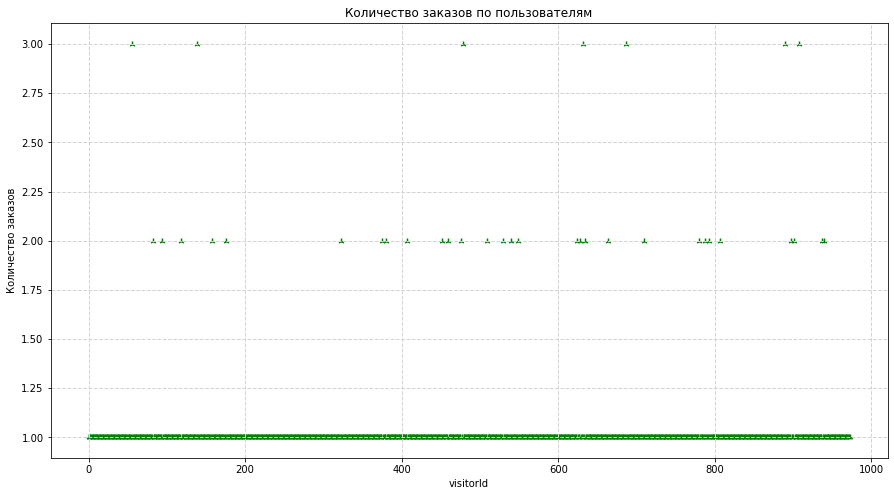

In [40]:
x_values = pd.Series(range(0,len(orders_per_user['orders'])))
plt.figure(figsize=(15,8))
plt.grid(color='lightgrey', linestyle='--', linewidth=1)
plt.scatter(x_values, orders_per_user['orders'], color='g', marker='2')
plt.title('Количество заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('visitorId')
plt.show()

Вывод по 2.6: Очевидно, что большиство покупателей делают заказ 1 раз. Так же много пользователей с 2-3 заказами.

**2.7 Расчёт 95 и 99 перцентили количества заказов на пользователя. Определение границы  аномальных пользователей**

In [41]:
print('95 перцентиль: %.2f' %  (np.percentile(orders_per_user['orders'], [95])))
print('99 перцентиль: %.2f' %  (np.percentile(orders_per_user['orders'], [99])))

95 перцентиль: 1.00
99 перцентиль: 2.00


In [42]:
print('Максимальное количество заказов: %.0f' %  (orders_per_user['orders'].max()))

Максимальное количество заказов: 3


Вывод по 2.7: Не более 1% пользователей делают более 4 заказов. Все, что больше 4 заказов - аномально (от 5 до 11 заказов)

**2.8 Точечный график стоимости заказов**

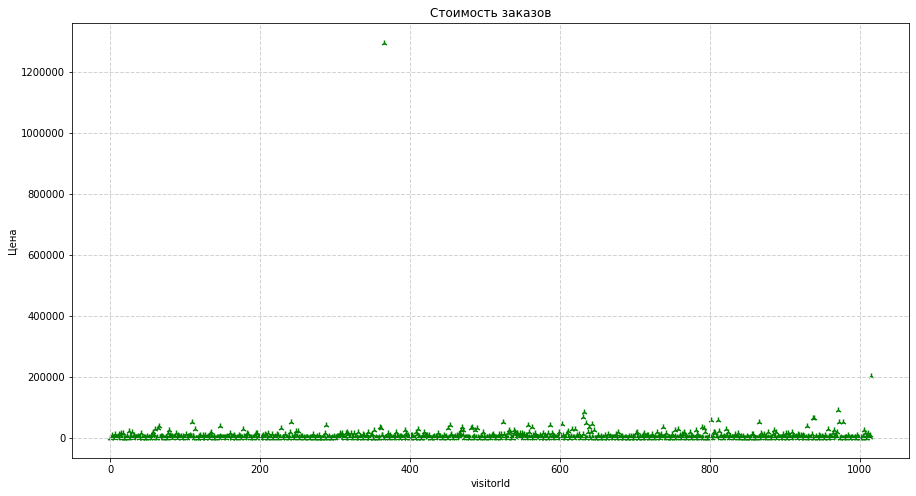

In [43]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,8))
plt.grid(color='lightgrey', linestyle='--', linewidth=1)
plt.scatter(x_values, orders['revenue'], color='g', marker='2')
plt.title('Стоимость заказов')
plt.ylabel('Цена')
plt.xlabel('visitorId')
plt.show()

Вывод по 2.8: Видны 2 отчётливых выброса на уровне 1200000 у.е. и 200000 у.е. (Пишем в у.е. тк валюта не ясна)

**2.9 Расчёт 95 и 99 перцентилей стоимости заказов. Определение границы  аномальных заказов.**

In [44]:
print('95 перцентиль: %.2f' %  (np.percentile(orders['revenue'], [95])))
print('99 перцентиль: %.2f' %  (np.percentile(orders['revenue'], [99])))

95 перцентиль: 26785.00
99 перцентиль: 53904.00


In [45]:
print('Максимальный доход от заказов: %.0f' %  (orders['revenue'].max()))

Максимальный доход от заказов: 1294500


Вывод по 2.9: Все что выше 99 перцентиля - аномально (58233.20 у.е.)

**2.10 Статистическая значимость различий в конверсии между группами по «сырым» данным**

In [46]:
conversion = orders.groupby('group').agg({'transactionId':'count'})
conversion.columns = ['orders']

In [47]:
conversion = conversion.join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()
conversion 

,group,orders,visitors
0,A,468,18736
1,B,548,18916


Зафиксируем наши гипотезы:

 - **H0**: Конверсия в группе A равно конверсии в группе B
 - **H1**: Конверсия в группе A не равна конверсии в группе B
 
Воспользуемся z-критерием для разности двух частей

In [48]:
alpha = 0.05
purchases = np.array(conversion['orders'])
leads = np.array(conversion['visitors'])
p1 = purchases[0] / leads[0]
p2 = purchases[1] / leads[1]
combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
difference = p1 - p2
z_value = difference / math.sqrt(combined * (1 - combined) * (1 / leads[0] + 1 / leads[1]))
distr = st.norm(0, 1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('p-value: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value:  0.016851380434703023
Отвергаем нулевую гипотезу


Вывод по 2.10: Нулевыу гипотезу отвергаем. Конверсия в группе A не равна конверсии в группе B.

 **2.11 Cтатистическая значимость различий в среднем чеке между группами по «очищенным» данным**

Зафиксируем наши гипотезы:

 - **H0**: Средний чек группы A равен среднему чеку группы B
 - **H1**: Средний чек группы A не равен среднему чеку группы B

Воспользуемся критерием Манна-Уитни, но сначала отобразим средний чек по группам А и В

In [49]:
print('Средний чек группы А: %.2f' %  (orders[orders['group']=='A']['revenue'].mean()))

Средний чек группы А: 7189.44


In [50]:
print('Средний чек группы В: %.2f' %  (orders[orders['group']=='B']['revenue'].mean()))

Средний чек группы В: 9249.95


In [51]:
alpha = 0.05
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative='two-sided')
p_value = results.pvalue
print('p-value: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value:  0.8294908998149533
Не получилось отвергнуть нулевую гипотезу


Вывод по 2.11: Средний чек группы A равен среднему чеку группы В. Нет статистически значимых различий.

**2.12 Статистическая значимость различий в конверсии между группами по «очищенным» данным**

In [52]:
#Для начала сделаем срез по критерию, который мы определили в пункте 2.7
orders_per_user_query = orders_per_user[orders_per_user['orders'] >= 2]['visitorId'].to_list()  ############ подправил с 4 на 2
orders_query = orders[~orders['visitorId'].isin(orders_per_user_query)]

In [53]:
#Для начала сделаем срез по критерию, который мы определили в пункте 2.7
conversion_query = orders_query.groupby('group').agg({'transactionId':'count'})
conversion_query.columns = ['orders']

In [54]:
conversion_query = conversion_query.join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()
conversion_query

,group,orders,visitors
0,A,427,18736
1,B,510,18916


Зафиксируем наши гипотезы:

 - **H0**: Конверсия в группе A равно конверсии в группе B
 - **H1**: Конверсия в группе A не равна конверсии в группе B
 
Воспользуемся z-критерием для разности двух частей

In [55]:
alpha = 0.05
purchases = np.array(conversion_query['orders'])
leads = np.array(conversion_query['visitors'])
p1 = purchases[0] / leads[0]
p2 = purchases[1] / leads[1]
combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
difference = p1 - p2
z_value = difference / math.sqrt(combined * (1 - combined) * (1 / leads[0] + 1 / leads[1]))
distr = st.norm(0, 1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('p-value: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value:  0.009384750340914794
Отвергаем нулевую гипотезу


Вывод по 2.12: Нулевыу гипотезу отвергаем. Конверсия в группе A не равна конверсии в группе B. Даже после удаления выбросов.

**2.13 Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным**

Зафиксируем наши гипотезы:

 - **H0**: Средний чек группы A равен среднему чеку группы B
 - **H1**: Средний чек группы A не равен среднему чек группы B

Воспользуемся критерием Манна-Уитни, но сначала отобразим средний чек по группам А и В. Сделаем срез по 99 перцентилю:

In [56]:
orders_query = orders.query('revenue <= 53904.00') ## подправил

In [57]:
print('Средний чек группы А: %.2f' % (orders_query[orders_query['group']=='A']['revenue'].mean()))

Средний чек группы А: 6504.55


In [58]:
print('Средний чек группы B: %.2f' % (orders_query[orders_query['group']=='B']['revenue'].mean()))

Средний чек группы B: 6298.83


In [59]:
alpha = 0.05
results = st.mannwhitneyu(orders_query[orders_query['group']=='A']['revenue'],
                          orders_query[orders_query['group']=='B']['revenue'], alternative='two-sided')
p_value = results.pvalue
print('p-value: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value:  0.9006884356560738
Не получилось отвергнуть нулевую гипотезу


Вывод по 2.13: Средний чек группы A равен среднему чеку группы В. Нет статистически значимых различий. Но, следует отметить, что после откидывания выбросов, значения среднего чека сильно сблизились.

**2.14 Результаты A/B-теста. Вывод.**

В соответствии с оценкой RICE отделу в первую очередь рекомендуется обратить внимение на следующие гипотезы:

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

В исходный датасет попали 57 пересечений по группам, как и почему они там оказались - неясно. В ходе работы данные строки были удалены.

А/B тест:

- По конверсии между группами A и B (как по сырым данным, так и по очищенным) существуют статистически значимые различия.
- По среднему чеку между группами A и B (как по сырым данным, так и по очищенным) нет статистически значимых различий.

Рекомендуется остановить тест и считать его успешным. Конверсия до покупателя в группе В статистически значимо выше. Следует отметить, что при этом средний чек между группами не отличается.
